In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
IdLookupTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
Location       0 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB


In [4]:
IdLookupTable.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [5]:
SampleSubmission = pd.read_csv('SampleSubmission.csv')
SampleSubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
RowId       27124 non-null int64
Location    27124 non-null int64
dtypes: int64(2)
memory usage: 423.9 KB


In [6]:
SampleSubmission.head()

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


In [8]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [9]:
training = pd.read_csv('training.csv')
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [10]:
training.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [11]:
training = training.dropna()

In [12]:
training.shape, type(training)

((2140, 31), pandas.core.frame.DataFrame)

In [13]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [14]:
def get_image_and_dots(df, index):
    image = plt.imshow(df['Image'][index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(df.loc[index][i-1], df.loc[index][i], 'ro'))
        
    return image, l

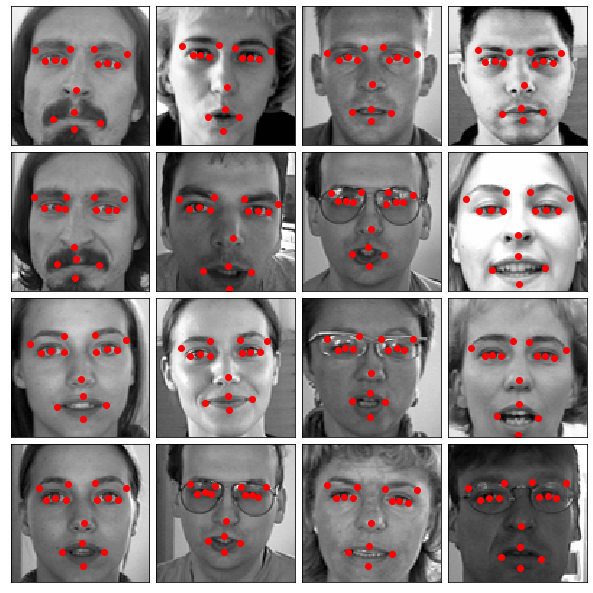

In [15]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    get_image_and_dots(training, i)

plt.show()

In [16]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)
y = training.drop(['Image'], axis=1)

In [17]:
X.shape

(2140, 96, 96, 1)

In [18]:
y.shape

(2140, 30)

In [19]:
type(X), type(y)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [20]:
y2 = y.to_numpy()

In [21]:
type(y2), y2.shape

(numpy.ndarray, (2140, 30))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

Using TensorFlow backend.


In [24]:
model = Sequential()

In [25]:
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [26]:
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

In [27]:

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)       

In [28]:
model.compile(optimizer='Adam', 
              loss='mse', 
              metrics=['mae'])

In [29]:
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1498/1498 [==============================] - 196s 131ms/step - loss: 191.8170 - mae: 8.3826
Epoch 2/500
1498/1498 [==============================] - 187s 125ms/step - loss: 25.7252 - mae: 3.9803
Epoch 3/500
1498/1498 [==============================] - 186s 124ms/step - loss: 21.3571 - mae: 3.6358
Epoch 4/500
1498/1498 [==============================] - 184s 123ms/step - loss: 18.3884 - mae: 3.3667
Epoch 5/500
1498/1498 [==============================] - 184s 123ms/step - loss: 16.3579 - mae: 3.1657
Epoch 6/500
1498/1498 [==============================] - 178s 119ms/step - loss: 14.8735 - mae: 3.0229
Epoch 7/500
1498/1498 [==============================] - 163s 109ms/step - loss: 14.3145 - mae: 2.9643
Epoch 8/500
1498/1498 [==============================] - 166s 111ms/step - loss: 12.0170 - mae: 2.7120
Epoch 9/500
1498/1498 [==============================] - 172s 115ms/step - loss: 13.1519 - mae: 2.8407
Epoch 10/500
1498/1498 [==============================] - 166s 111ms/ste

1498/1498 [==============================] - 173s 115ms/step - loss: 3.7508 - mae: 1.4849
Epoch 160/500
1498/1498 [==============================] - 168s 112ms/step - loss: 3.5113 - mae: 1.4399
Epoch 161/500
1498/1498 [==============================] - 169s 113ms/step - loss: 3.4472 - mae: 1.4355
Epoch 162/500
1498/1498 [==============================] - 169s 113ms/step - loss: 3.7582 - mae: 1.4957
Epoch 163/500
1498/1498 [==============================] - 168s 112ms/step - loss: 3.7572 - mae: 1.4912
Epoch 164/500
1498/1498 [==============================] - 170s 113ms/step - loss: 3.5586 - mae: 1.4467
Epoch 165/500
1498/1498 [==============================] - 169s 113ms/step - loss: 3.4871 - mae: 1.4375
Epoch 166/500
1498/1498 [==============================] - 169s 113ms/step - loss: 3.4816 - mae: 1.4316
Epoch 167/500
1498/1498 [==============================] - 171s 114ms/step - loss: 3.3033 - mae: 1.3922
Epoch 168/500
1498/1498 [==============================] - 170s 114ms/step - l

1498/1498 [==============================] - 172s 115ms/step - loss: 2.7839 - mae: 1.2789
Epoch 316/500
1498/1498 [==============================] - 172s 115ms/step - loss: 3.1777 - mae: 1.3800
Epoch 317/500
1498/1498 [==============================] - 174s 116ms/step - loss: 3.5897 - mae: 1.4521
Epoch 318/500
1498/1498 [==============================] - 173s 115ms/step - loss: 3.3753 - mae: 1.4159
Epoch 319/500
1498/1498 [==============================] - 172s 115ms/step - loss: 2.7993 - mae: 1.2892
Epoch 320/500
1498/1498 [==============================] - 174s 116ms/step - loss: 3.2255 - mae: 1.3866
Epoch 321/500
1498/1498 [==============================] - 172s 115ms/step - loss: 3.7156 - mae: 1.4947
Epoch 322/500
1498/1498 [==============================] - 173s 115ms/step - loss: 4.3627 - mae: 1.6058
Epoch 323/500
1498/1498 [==============================] - 173s 115ms/step - loss: 2.9942 - mae: 1.3273
Epoch 324/500
1498/1498 [==============================] - 181s 121ms/step - l

1498/1498 [==============================] - 174s 116ms/step - loss: 2.8979 - mae: 1.3119
Epoch 472/500
1498/1498 [==============================] - 174s 116ms/step - loss: 3.1184 - mae: 1.3630
Epoch 473/500
1498/1498 [==============================] - 176s 117ms/step - loss: 3.0717 - mae: 1.3517
Epoch 474/500
1498/1498 [==============================] - 172s 115ms/step - loss: 2.7903 - mae: 1.2925
Epoch 475/500
1498/1498 [==============================] - 173s 115ms/step - loss: 3.2394 - mae: 1.3872
Epoch 476/500
1498/1498 [==============================] - 174s 116ms/step - loss: 2.8158 - mae: 1.2941
Epoch 477/500
1498/1498 [==============================] - 172s 115ms/step - loss: 2.8355 - mae: 1.2955
Epoch 478/500
1498/1498 [==============================] - 173s 115ms/step - loss: 2.8558 - mae: 1.2933
Epoch 479/500
1498/1498 [==============================] - 179s 119ms/step - loss: 2.9581 - mae: 1.3315
Epoch 480/500
1498/1498 [==============================] - 176s 117ms/step - l

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8312541374536317
Test accuracy: 0.9459460377693176


In [31]:
model.save('keypoint_model22.h5')

In [32]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [33]:
test.shape, type(test)

((1783, 2), pandas.core.frame.DataFrame)

In [34]:
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)
test_res = model.predict(test_X)

In [35]:
train_predicts = model.predict(X_train)

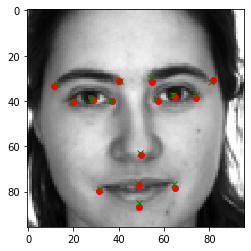

In [36]:
n = 11

xv = X_train[n].reshape((96,96))
plt.imshow(xv,cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[n][i-1], train_predicts[n][i], 'ro')
    plt.plot(y_train[n][i-1], y_train[n][i], 'x', color='green')

plt.show()

In [37]:
header = list(y.columns)

In [38]:
test_predicts = pd.DataFrame(test_res, columns = header)

In [39]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = test_predicts.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

c:\users\alexandre\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
SampleSubmission.Location = IdLookupTable.Location

In [41]:
my_submission = SampleSubmission

In [42]:
my_submission.to_csv('submission.csv', index=False)